In [49]:
import os
import tarfile
import urllib

TITANIC_URL = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"

In [50]:
def fetch_titanic_data(url=TITANIC_URL, path='datasets'):
  os.makedirs(path, exist_ok=True)
  csv_path = os.path.join(path, "titanic.csv")
  urllib.request.urlretrieve(url, csv_path)

In [51]:
fetch_titanic_data()

In [52]:
import pandas as pd
def load_titanic_data(path='datasets'):
  csv_path = os.path.join(path, "titanic.csv")
  return pd.read_csv(csv_path)

In [53]:
titanic = load_titanic_data()

In [54]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [55]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [56]:
# ML prefers numerical data. Convert Sex to 1s and 0s

# titanic["Sex"].replace(['male', 'female'], [1, 0], inplace=True)
# titanic.head()
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500


In [57]:
titanic.describe()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,0.645998,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,0.478480,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,0.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.32920


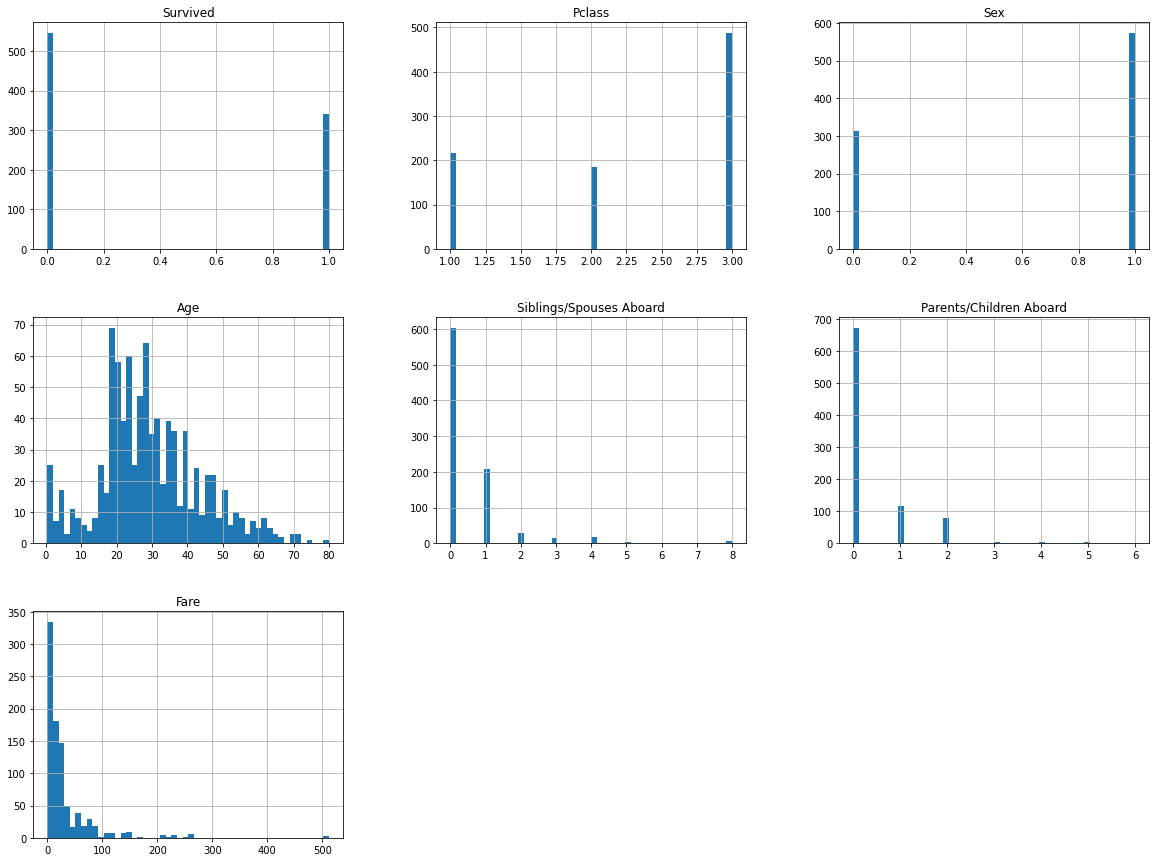

In [58]:
import matplotlib.pyplot as plt
titanic.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Age'>

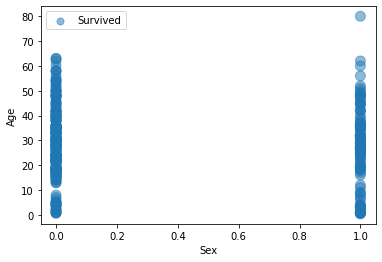

In [66]:
titanic.plot(kind='scatter', x='Sex', y='Age', s=titanic["Survived"] * 100, alpha=0.5, label="Survived")

In [67]:
corr_matrix = titanic.corr()

In [76]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived                   1.000000
Fare                       0.256179
Parents/Children Aboard    0.080097
Siblings/Spouses Aboard   -0.037082
Age                       -0.059665
Pclass                    -0.336528
Sex                       -0.542152
Name: Survived, dtype: float64